In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style(style="darkgrid")
import plotly.express as px

from sklearn.model_selection import train_test_split

In [73]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error, log_loss
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score, auc
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [2]:
df = pd.read_csv('Data/dataset.csv')

In [3]:
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [4]:
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [5]:
df.tail(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3323,IN,117,415,362-5899,no,no,0,118.4,126,20.13,...,97,21.19,227.0,56,10.22,13.6,3,3.67,5,True
3324,WV,159,415,377-1164,no,no,0,169.8,114,28.87,...,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
3325,OH,78,408,368-8555,no,no,0,193.4,99,32.88,...,88,9.94,243.3,109,10.95,9.3,4,2.51,2,False
3326,OH,96,415,347-6812,no,no,0,106.6,128,18.12,...,87,24.21,178.9,92,8.05,14.9,7,4.02,1,False
3327,SC,79,415,348-3830,no,no,0,134.7,98,22.90,...,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
missing_values_count = df.isna().sum()
missing_values_count

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [9]:
duplicates = df.duplicated().sum()
duplicates

0

In [10]:
df.columns.unique()

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [11]:
len(df['state'].unique())

51

In [12]:
unique_states = df['state'].unique()
unique_states

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [13]:
unique_states_list = unique_states.tolist()
unique_states_list

['KS',
 'OH',
 'NJ',
 'OK',
 'AL',
 'MA',
 'MO',
 'LA',
 'WV',
 'IN',
 'RI',
 'IA',
 'MT',
 'NY',
 'ID',
 'VT',
 'VA',
 'TX',
 'FL',
 'CO',
 'AZ',
 'SC',
 'NE',
 'WY',
 'HI',
 'IL',
 'NH',
 'GA',
 'AK',
 'MD',
 'AR',
 'WI',
 'OR',
 'MI',
 'DE',
 'UT',
 'CA',
 'MN',
 'SD',
 'NC',
 'WA',
 'NM',
 'NV',
 'DC',
 'KY',
 'ME',
 'MS',
 'TN',
 'PA',
 'CT',
 'ND']

In [14]:
df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [15]:
df['churn'].value_counts(normalize=True) * 100

churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64

In [38]:
state_series = df.groupby(['state'])['churn'].mean().sort_values(ascending = False)
state_df = state_series.to_frame().reset_index()
state_df

,state,churn
0,NJ,0.264706
1,CA,0.264706
2,TX,0.250000
3,MD,0.242857
4,SC,0.233333
5,MI,0.219178
6,MS,0.215385
7,NV,0.212121
8,WA,0.212121
9,ME,0.209677


In [42]:
fig = px.choropleth(state_df,
                    locations='state',
                    color='churn',
                    #color_continuous_scale='spectral_r',
                    hover_name='state',
                    locationmode='USA-states',
                    labels={'Churn by State'},
                    scope='usa',
                    title='Churn by State')
fig.show()

In [44]:
df['account length'].describe()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: account length, dtype: float64

In [45]:
df['area code'].value_counts()

area code
415    1655
510     840
408     838
Name: count, dtype: int64

In [46]:
df['international plan'].value_counts()

international plan
no     3010
yes     323
Name: count, dtype: int64

In [47]:
df['voice mail plan'].value_counts()

voice mail plan
no     2411
yes     922
Name: count, dtype: int64

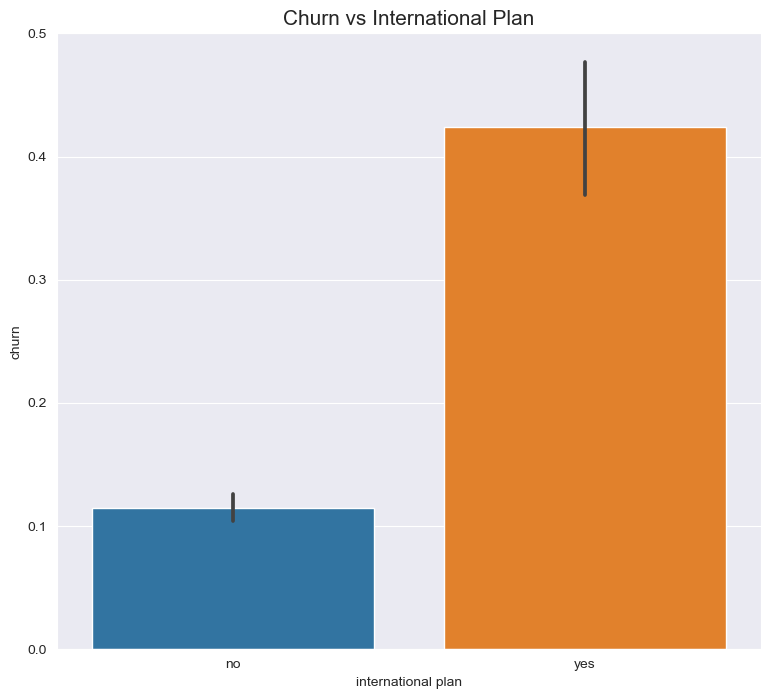

In [56]:
fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(121)
ax1 = sns.barplot(x='international plan', y='churn', data=df)
ax1.set_title('Churn vs International Plan', fontsize = 15)
ax1.set_ylim((0, 0.50))
plt.show()

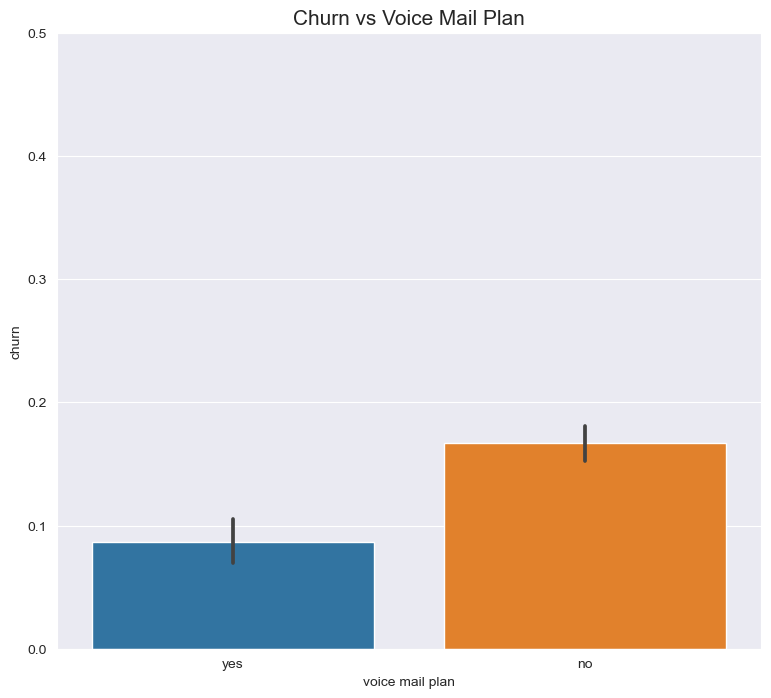

In [57]:
fig = plt.figure(figsize=(20,8))

ax2 = fig.add_subplot(122)
ax2 = sns.barplot(x='voice mail plan', y='churn', data=df)
ax2.set_title('Churn vs Voice Mail Plan', fontsize = 15)
ax2.set_ylim((0, 0.50))
plt.show()

In [60]:
df['customer service calls'].value_counts()

customer service calls
1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: count, dtype: int64

In [62]:
order = df.groupby('customer service calls')['churn'].mean().sort_values(ascending=False).index


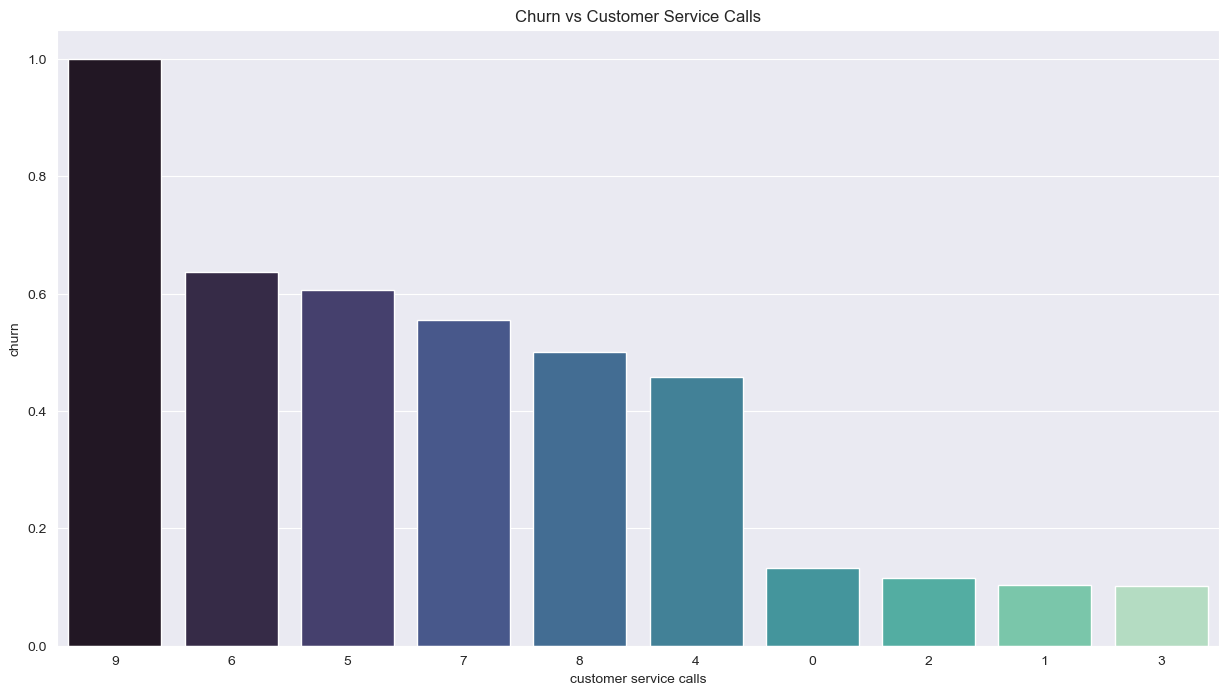

In [63]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='customer service calls', y='churn', data=df,order=order, palette='mako', ci=None)
plt.title('Churn vs Customer Service Calls')
plt.show()

In [80]:
#total_domestic_charge = total_day_charge + total_eve_charge + total_night_charge
df['total domestic charge'] = df.loc[:,['total day charge', 'total eve charge',
                                    'total night charge']].sum(axis=1)

In [81]:
#monthly charge = total domestic charge + total intl charge
df['monthly charge'] = df['total domestic charge'] + df['total intl charge']


In [83]:
#total_charge = montly_charge * account_length
df['total charge'] = df['monthly charge'] * df['account length']


In [82]:
df_mc = df.groupby(['churn'])['monthly charge'].mean()
df_mc

churn
False    58.448807
True     65.355963
Name: monthly charge, dtype: float64

In [84]:
df_tc = df.groupby(['churn'])['total charge'].mean()
df_tc

churn
False    5891.877116
True     6699.308799
Name: total charge, dtype: float64

In [90]:
ds_al = df.groupby(['churn'])['account length'].mean()
ds_al.rename({False: 'not churn', True: 'churn'}, inplace=True)
df_al = pd.DataFrame(ds_al)
df_al

,account length
churn,
not churn,100.793684
churn,102.664596


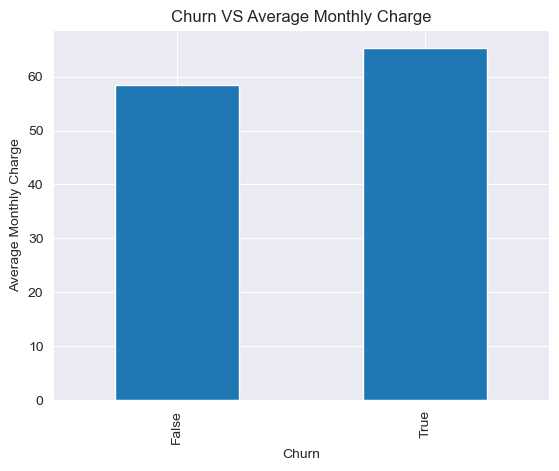

In [88]:
df_mc.plot.bar()
x = ['monthly charge']
y = df_mc.index
plt.title('Churn VS Average Monthly Charge')
plt.xlabel('Churn')
plt.ylabel('Average Monthly Charge')
plt.show()